In [2]:
# %%html
# <style>
# .output_wrapper, .output {
#     height:auto !important;
#     max-height:1000px;  /* your desired max-height here */
# }
# .output_scroll {
#     box-shadow:none !important;
#     webkit-box-shadow:none !important;
# }
# </style>

In [3]:
import tensorflow as tf

In [4]:
import melt
import numpy as np
import gezi
from gezi import tqdm
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import umap

In [5]:
from tensorflow.python import pywrap_tensorflow
root = '/search/odin/publicData/CloudS/mkyuwen/rank_online/data/video_hour_sgsapp_v1/models/1'
model_dir = root + '/2020091522'
var_name = 'embeddings'
checkpoint_path = melt.get_model_path(model_dir)
reader = pywrap_tensorflow.NewCheckpointReader(checkpoint_path)
var_to_shape_map = reader.get_variable_to_shape_map()
for key in var_to_shape_map:
  if var_name in key:
    print("tensor_name: ", key)
#     print(reader.get_tensor(key))

tensor_name:  wide_deep/wide_1/emb/emb/embeddings2
tensor_name:  wide_deep/wide_1/emb/emb/embeddings
tensor_name:  wide_deep/wide/emb/emb/embeddings2
tensor_name:  wide_deep/wide/emb/emb/embeddings
tensor_name:  wide_deep/deep/weekday_emb/embeddings
tensor_name:  wide_deep/deep/user_emb/embeddings
tensor_name:  wide_deep/deep/topic_emb/embeddings
tensor_name:  wide_deep/deep/time_emb/embeddings
tensor_name:  wide_deep/deep/mktest_kw_emb/embeddings
tensor_name:  wide_deep/deep/kw_emb/embeddings
tensor_name:  wide_deep/deep/emb/emb/embeddings2
tensor_name:  wide_deep/deep/emb/emb/embeddings
tensor_name:  wide_deep/deep/doc_emb/embeddings2
tensor_name:  wide_deep/deep/doc_emb/embeddings
tensor_name:  wide_deep/deep/distribution_id_emb/embeddings
tensor_name:  OptimizeLoss___0/wide_deep/deep/emb/emb/embeddings/Adam
tensor_name:  OptimizeLoss___0_1/wide_deep/wide_1/emb/emb/embeddings/Adam
tensor_name:  wide_deep/deep/user_emb/embeddings2
tensor_name:  OptimizeLoss___0/wide_deep/deep/cold_em

In [6]:
# reader.get_tensor('wide_deep/deep/doc_emb/embeddings2')

In [8]:
def visualize_embeddings_umap(emb_l, 
                              output_dir    = "/home/gezi/tmp",
                              max_size      = 10000000, 
                              umap_metric   = "euclidean",
                              use_max_count = True):

  E = emb_l
  print("umap", E.shape)

  n_vis = min(max_size, E.shape[0])
  min_cnt = 0

#        reducer = umap.UMAP(random_state=42, n_neighbors=25, min_dist=0.1)
  reducer = umap.UMAP(random_state=42, metric=umap_metric)

  if use_max_count is False or n_vis == E.shape[0]:
      Y = reducer.fit_transform(E[:n_vis,:])

  plt.figure(figsize=(8,8))

  linewidth = 0
  size      = 1

  if Y.shape[0] < 2500:
      linewidth = 1 
      size      = 5


  plt.scatter(-Y[:,0], -Y[:,1], s=size, marker=".", linewidth=linewidth)

  plt.title("UMAP: categorical var. " + "  (" + str(n_vis) + " of " + str(E.shape[0]) + ", min count " + str(min_cnt) + ")")
  plt.show()
  plt.savefig(output_dir + "/cat-" + str(n_vis) + "-of-" + str(E.shape[0]) + "-umap.png")
  plt.close()

In [ ]:
visualize_embeddings_umap(reader.get_tensor('wide_deep/deep/doc_emb/embeddings'))

umap (3000001, 32)


<IPython.core.display.Javascript object>


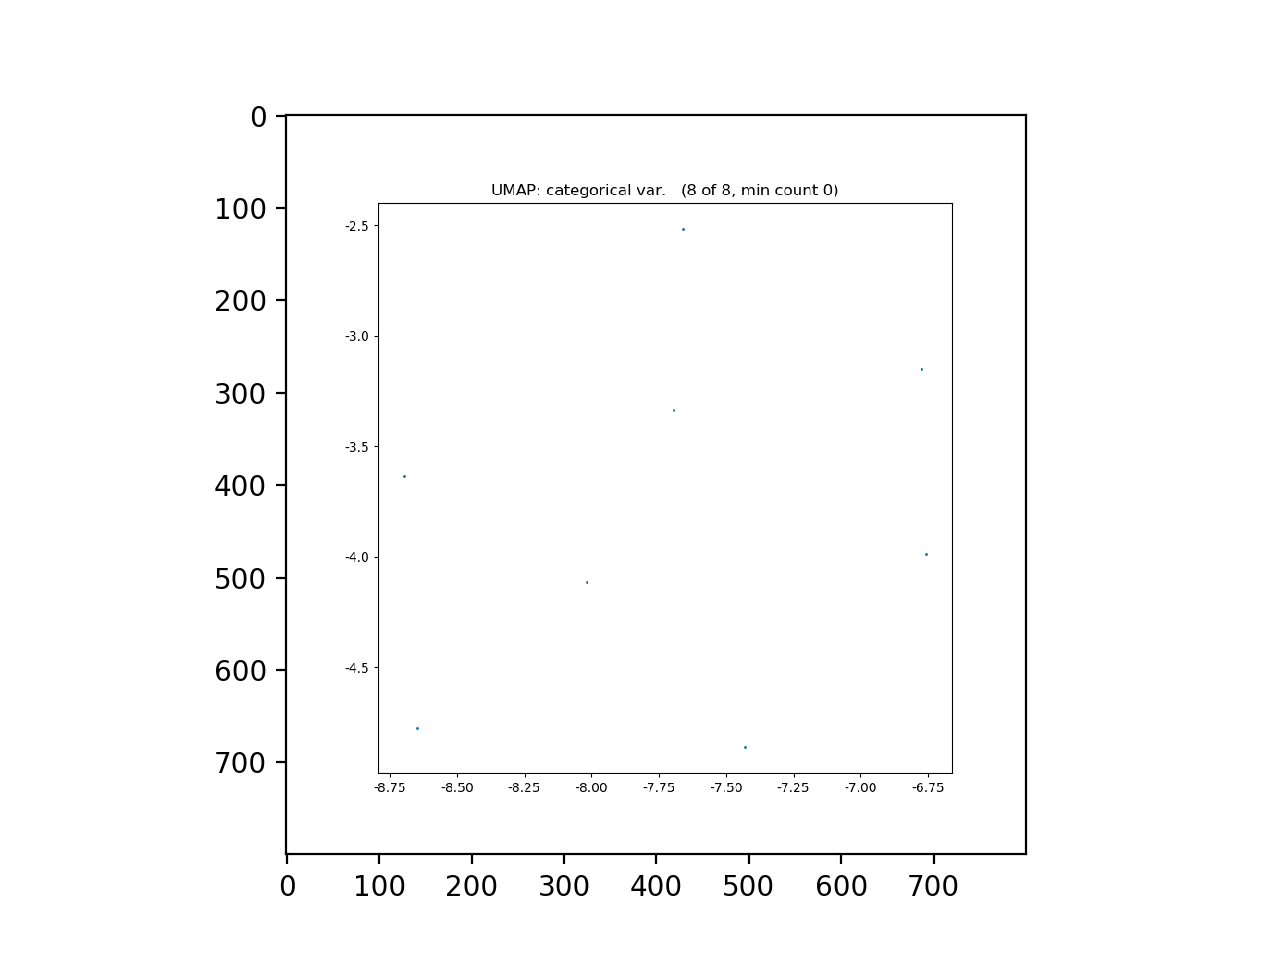

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("/home/gezi/tmp/cat-8-of-8-umap.png")
plt.imshow(image)
plt.show()

In [10]:
!ls /home/gezi/tmp

abc.tfrecord  cat-8-of-8-umap.png     intel  rank     test.sh
a.csv	      cat-norm-histogram.png  mango  rerank   tfrecord.835960.22189
ad2020	      embedding.npy	      melt   run.sh
a.out	      imdb		      mind   test.cc
bert	      imdb.tar.gz	      model  test.py
